# Information

- Filename: `dissipation-theory--Study-47.ipynb`
- Continued from: `dissipation-theory--Study-46.ipynb`
- Continued to: `--`

# Preliminaries

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from dissipationtheory.constants import ureg, epsilon0, qe

In [2]:
THIS = 'dissipation-theory--Study-47--'
figs = {}

In [3]:
from dissipationtheory.dissipation8a import CantileverModel, SampleModel1, SampleModel2
from dissipationtheory.dissipation8b import CantileverModelJit, SampleModel1Jit, SampleModel2Jit
from dissipationtheory.dissipation8b import integrand1jit, integrand2jit, K_jit

# Explore $K_2$ versus $h$ for selected values of $z_{\mathrm{r}}$

Create a "metallic" sample.  Start by creating a cantilever object.

In [4]:
cantilever = CantileverModel(
    f_c = ureg.Quantity(75, 'kHz'),
    k_c = ureg.Quantity(2.8, 'N/m'), 
    V_ts = ureg.Quantity(1, 'V'), 
    R = ureg.Quantity(35, 'nm'),
    angle = ureg.Quantity(20, 'degree'),
    L = ureg.Quantity(1000, 'nm'), 
    d = ureg.Quantity(38, 'nm')
)

Now make three different Type I metallic samples. 

The *only* difference between the samples is the reference length $z_{\mathrm{r}}$.

In [5]:
sample1_metal = {}
sample1_jit_metal = {}
zr_list = [0.1, 1, 2, 10, 100]

for zr in zr_list:
    
    sample1_metal[zr] = SampleModel1(
        cantilever = cantilever,
        h_s = ureg.Quantity(1e-6, 'nm'),  # not zero
        epsilon_s = ureg.Quantity(complex(1, 0), ''),
        sigma = ureg.Quantity(1e9, 'S/m'),
        rho = ureg.Quantity(1e26, '1/m^3'),
        epsilon_d = ureg.Quantity(complex(1e6, 0), ''),
        z_r = ureg.Quantity(zr, 'nm') # <== vary this
    )
    
    sample1_jit_metal[zr] = SampleModel1Jit(**sample1_metal[zr].args())

All three samples have the same physical properties.  Print the Deybe length for sample `A`.  The Deybe length is 0.120 nm.

In [6]:
print("Debye length = {:0.3f} nm".format(1e9/sample1_jit_metal[1].kD))

Debye length = 0.120 nm


Create a logarithmically spaced set of heights starting at 10 nm and ending at 1000 nm, a three decade range.

In [7]:
h_array = np.logspace(
    start=np.log10(10e-9),
    stop=np.log10(10e-6),
    num=50,
    endpoint=True)

Compute $K_2^{\prime}(\omega=0, r_1, r_2)$ (the real part) at $r_1 = (0, 0, h)$ and $r_2 = (0, 0, h)$, with $h$ varied, using three different reference heights $z_{\mathrm{r}}$.

In [8]:
K2 = {}
K2['h [nm]'] = 1e9 * h_array

keys = list(sample1_jit_metal.keys())
for key in keys:
    K2array = np.zeros_like(h_array)
    for index, h in enumerate(h_array):
        K2array[index] = K_jit(integrand=integrand1jit, 
            power=2,
            sample=sample1_jit_metal[key], 
            omega=0,
            location1=np.array([0., 0., h]),
            location2=np.array([0., 0., h]),
            isImag=False).to('1/um^3').magnitude
    K2['$z_\mathrm{{r}}$ = {:0.1f} nm'.format(key)] = K2array

Display the results in a `pandas` table.

In [9]:
pd.options.display.float_format = '{:.3f}'.format
df = pd.DataFrame.from_dict(K2)

In [10]:
display(df)

,h [nm],$z_\mathrm{r}$ = 0.1 nm,$z_\mathrm{r}$ = 1.0 nm,$z_\mathrm{r}$ = 2.0 nm,$z_\mathrm{r}$ = 10.0 nm,$z_\mathrm{r}$ = 100.0 nm
0,10.000,249999.425,249999.425,249999.425,249999.425,249999.425
1,11.514,163781.769,163781.769,163781.769,163781.769,163781.769
2,13.257,107298.118,107298.118,107298.118,107298.118,107298.118
3,15.264,70294.063,70294.063,70294.063,70294.063,70294.063
4,17.575,46051.649,46051.649,46051.649,46051.649,46051.649
5,20.236,30169.751,30169.751,30169.751,30169.751,30169.751
6,23.300,19765.066,19765.066,19765.066,19765.066,19765.066
7,26.827,12948.659,12948.659,12948.659,12948.659,12948.659
8,30.888,8483.143,8483.037,8483.037,8483.037,8483.037
9,35.565,6036.896,5557.480,5557.480,5557.480,5557.480


In the above table, $z_{\mathrm{r}} = 0.1$, $1$, and $10$ nm.  We can see that $K_2$ is independent of $z_\mathrm{r}$ only at very small $h$.  At large $h$, in contrast, the values of $K_2$ depends markedly on the choice of $z_\mathrm{r}$.

# Plot the findings

In [11]:
def plotme(df):

    with plt.style.context('seaborn-v0_8'):
        
        fig, ax = plt.subplots(figsize=(3.5, 4))
        df.plot(x='h [nm]', logy=True, logx=True, ax=ax)
        ax.set_ylim([1e-4,1e6])
        ax.set_xlabel('height $h$ [nm]')
        ax.set_ylabel('integral $K_2(\omega=0,r_1,r_2)$')
        ax.legend(frameon=True,facecolor='w')
        
        return fig

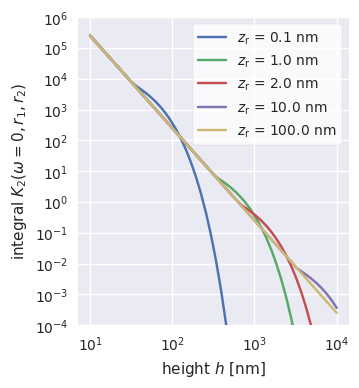

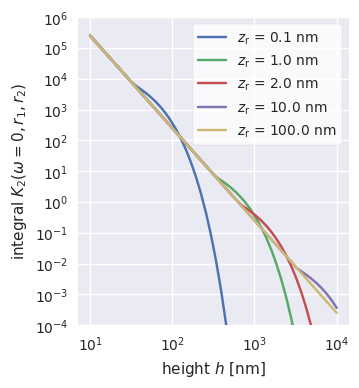

In [12]:
figs['01'] = plotme(df)
figs['01']

We see that $K_2$ blows up at an $h$ that depends on $z_{\mathrm{r}}$. Having $K_2$ remain well behaved at large $h$ requires a concommitantly large $z_{\mathrm{r}}$. The function $K_2$ blows up in a non-trivial way.  As $h$ increases, $K_2$ exhibits a modest positive error before showing a catastrophic negative error.  It is also apparent from the plot that $K_2 \propto h^{-3}$; the $x$ axis spans $10^{3}$ while the $y$-axis (for the $z_{\mathrm{r}} = 100 \: \mathrm{nm}$ data) spans approximately $10^{9}$.

<div class="alert alert-block alert-danger">
Unless the reference height $z_{\mathrm{r}}$ is on the order of the height $h$, the integral $K_2(\omega=0, r_1 = [0, 0, h], r_2 = [0, 0, h])$ will blow up.
</div>

::: {.content-hidden when-format="html"}

# Save the figures

In [13]:
if 1:
    for num in figs.keys():
        figname = THIS + "Fig-" + num
        figs[num].savefig(figname + '.png', dpi=300)
        figs[num].savefig(figname + '.pdf')

::: {.content-hidden when-format="html"}

# Formatting notes

The header at the top of this file is for creating a nicely-formatted `.html` document using the program `quarto` ([link](https://quarto.org/)).  To create nicely-formated `.html`versions of this notebook, run `quarto` from the command line as follows

    quarto render dissipation-theory--Study-47.ipynb && open dissipation-theory--Study-47.html